In [1]:
using Plots

┌ Info: Recompiling stale cache file /Users/mac/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184


In [4]:
y(x1, x2, theta) = theta * x1 + (1 - theta)*x2

y (generic function with 1 method)

In [5]:
y([0, 1], [1, 0], 0.5)

2-element Array{Float64,1}:
 0.5
 0.5

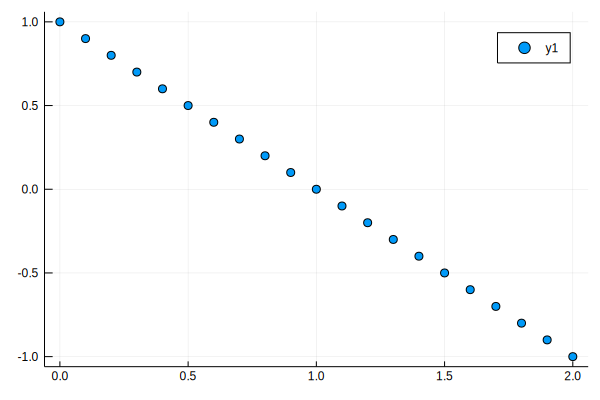

In [12]:
scatter([y([0, 1], [1, 0], i)[1] for i in -1:0.1:1], [y([0, 1], [1, 0], i)[2] for i in -1:0.1:1])


In [1]:
A = [-0.1 2.8 -1.6; 2.3 -0.6 -3.6]

2×3 Array{Float64,2}:
 -0.1   2.8  -1.6
  2.3  -0.6  -3.6

In [2]:
f(x) = A*x

f (generic function with 1 method)

In [3]:
x = [1, 2, 3]; y = [-3, -1, 2];
alpha = 0.5; beta = -1.6;

In [4]:
lhs = f(alpha*x + beta * y)

2-element Array{Float64,1}:
  9.469999999999999
 16.75             

In [5]:
rhs = alpha * f(x) + beta * f(y)

2-element Array{Float64,1}:
  9.47
 16.75

In [7]:
using LinearAlgebra
norm(lhs-rhs)

1.7763568394002505e-15

## Taylor 近似

In [8]:
f(x) = [norm(x -a), norm(x - b)]

f (generic function with 1 method)

In [9]:
Df(z) = [(z - a)' / norm(z - a); (z - b)' / norm(z - b)]

Df (generic function with 1 method)

In [10]:
f_hat(x) = f(z) + Df(z) * (x - z)

f_hat (generic function with 1 method)

In [11]:
a = [1, 0]; b = [1, 1]; z = [0, 0];

In [12]:
f([0.1, 0.1])

2-element Array{Float64,1}:
 0.9055385138137417
 1.2727922061357855

In [13]:
f_hat([0.1, 0.1])

2-element Array{Float64,1}:
 0.9               
 1.2727922061357857

In [14]:
using VMLS

In [15]:
beta = [148.73, -18.85]; v = 54.50;

In [16]:
D = house_sales_data();

In [17]:
yd = D["price"];
N = length(yd)

774

In [18]:
X = [D["area"] D["beds"]]'

2×774 Adjoint{Float64,Array{Float64,2}}:
 0.941  1.146  0.909  1.289  1.02  1.022  …  2.28  1.477  1.216  1.685  1.362
 2.0    3.0    3.0    3.0    3.0   2.0       4.0   3.0    3.0    4.0    3.0  

In [19]:
ydhat = X' * beta .+ v

774-element Array{Float64,1}:
 156.75493         
 168.39457999999996
 133.14557         
 189.66296999999997
 149.6546          
 168.80205999999998
 185.45981999999998
 142.32811999999998
 135.04035         
 104.25323999999999
 199.62787999999998
 164.23014         
 176.76216999999997
   ⋮               
 140.73079999999996
 214.50087999999997
 213.60849999999996
 199.92533999999998
 176.76216999999997
 234.17194999999998
 185.64726         
 318.20439999999996
 217.62420999999998
 178.80567999999997
 229.71005         
 200.52025999999998

In [20]:
rd = yd - ydhat
rms(rd)

74.8458081542367

In [21]:
stdev(yd)

112.78216159756509

## 线性动态系统

$$x_{t+1} = A x_{t}, t=1,...,T,$$
其中，A 是一个矩阵

In [22]:
x_1 = [1, 0, -1]; # initial state

In [23]:
n = length(x_1); T = 50;

In [25]:
A = [0.97 0.10 -0.05; -0.3 0.99 0.05; 0.01 -0.04 0.96;];

In [26]:
stat_traj = [x_1 zeros(n, T - 1)]

3×50 Array{Float64,2}:
  1.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 -1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [27]:
for t=1:T-1
    stat_traj[:, t+1] = A * stat_traj[:, t]
end

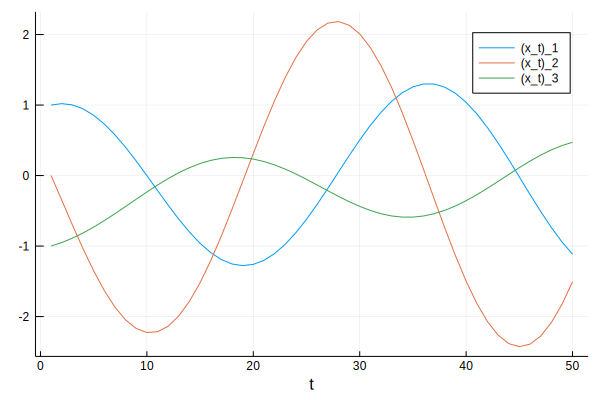

In [28]:
using Plots
plot(1:T, stat_traj', xlabel="t", label=["(x_t)_1", "(x_t)_2", "(x_t)_3"])

# QR分解

In [29]:
A = randn(6, 4)
Q, R = qr(A)

LinearAlgebra.QRCompactWY{Float64,Array{Float64,2}}
Q factor:
6×6 LinearAlgebra.QRCompactWYQ{Float64,Array{Float64,2}}:
 -0.46557     0.445199    0.412888  -0.609866    0.0911449   -0.185261  
  0.122209   -0.177315    0.648238   0.231837   -0.599568    -0.346672  
 -0.737937   -0.359627    0.106324   0.453335    0.311015    -0.112116  
 -0.43828    -0.226832   -0.39408   -0.271374   -0.687937     0.232934  
  0.175965   -0.767145    0.176015  -0.536027    0.249362    -0.00620337
 -0.0265613   0.0325997   0.460137   0.0885091   0.00645137   0.8824    
R factor:
4×4 Array{Float64,2}:
 2.04842   0.536684  0.995362  -1.3317  
 0.0      -3.09827   0.604358  -0.681951
 0.0       0.0       2.50141    0.294005
 0.0       0.0       0.0        1.01753 

In [31]:
Q = Matrix(Q)

6×4 Array{Float64,2}:
 -0.46557     0.445199    0.412888  -0.609866 
  0.122209   -0.177315    0.648238   0.231837 
 -0.737937   -0.359627    0.106324   0.453335 
 -0.43828    -0.226832   -0.39408   -0.271374 
  0.175965   -0.767145    0.176015  -0.536027 
 -0.0265613   0.0325997   0.460137   0.0885091

In [33]:
norm(Q * R - A)

1.3524258457248434e-15

In [34]:
Q' * Q

4×4 Array{Float64,2}:
  1.0          -4.70544e-17   2.42861e-16   3.98986e-17
 -4.70544e-17   1.0           1.63064e-16   2.7929e-16 
  2.42861e-16   1.63064e-16   1.0          -9.02056e-17
  3.98986e-17   2.7929e-16   -9.02056e-17   1.0        